In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv('combined_hospital_data_inr.csv')

In [ ]:
df.head()

,Staff_Id,Bed_ID,Dpt_ID,ID,Name,Gender,City,State,Age,Patient type,...,ER_Time,Date,Feedback,Rating,Age Bucket,Custom,FZ me,Staff Name,Department_Name,Bed Number
0,30016,20001,108,278,"Allen, Savannah",F,oxford,California,7,outpatient,...,23.0,2007-10-16,Fully Agree,5.0,6-20Y,Null,Postive,f16,OPD Outpatient department (OPD),X1
1,30032,20002,108,294,"Alonso, Arthur",M,Chula Vista,England,43,outpatient,...,30.0,2007-11-01,Fully Agree,5.0,41-60y,Null,Postive,f32,OPD Outpatient department (OPD),X2
2,30040,20003,108,302,"Alonso, Carrie",F,Royal Oak,Seine (Paris),2,outpatient,...,36.0,2007-11-09,Fully Agree,5.0,Below 6Y,Null,Postive,f40,OPD Outpatient department (OPD),X3
3,30046,20004,108,308,"Alonso, Danny",M,Royal Oak,Queensland,8,outpatient,...,50.0,2007-11-15,Fully Agree,5.0,6-20Y,Null,Postive,f46,OPD Outpatient department (OPD),X4
4,30052,20005,108,314,"Alonso, Diane",F,Royal Oak,New South Wales,14,outpatient,...,48.0,2007-11-21,Fully Agree,5.0,6-20Y,Null,Postive,f52,OPD Outpatient department (OPD),X5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Staff_Id         2506 non-null   int64  
 1   Bed_ID           2506 non-null   int64  
 2   Dpt_ID           2506 non-null   int64  
 3   ID               2506 non-null   int64  
 4   Name             2506 non-null   object 
 5   Gender           2506 non-null   object 
 6   City             2506 non-null   object 
 7   State            2506 non-null   object 
 8   Age              2506 non-null   int64  
 9   Patient type     2506 non-null   object 
 10  Status           2506 non-null   object 
 11  treatemencost    2506 non-null   float64
 12  Bed              1751 non-null   object 
 13  LOS              2506 non-null   int64  
 14  ER_Time          1787 non-null   float64
 15  Date             2506 non-null   object 
 16  Feedback         2506 non-null   object 
 17  Rating        

In [ ]:
#Dropping columns
drop_cols = [ 'Name', 'Staff Name', 'Bed Number', 'Staff_Id']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)


In [ ]:
#Missing values
df.isnull().sum()

,0
Bed_ID,0
Dpt_ID,0
ID,0
Gender,0
City,0
State,0
Age,0
Patient type,0
Status,0
treatemencost,0


In [ ]:
df['Bed'].unique()

array([nan, 'Occupied'], dtype=object)

In [ ]:
#Replacing null values

df['Bed'].fillna('Not occupied',inplace=True)
df['ER_Time'] = df['ER_Time'].fillna(df['ER_Time'].median())

/tmp/ipython-input-56-376887613.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bed'].fillna('Not occupied',inplace=True)


In [ ]:
df.isnull().sum()

,0
Bed_ID,0
Dpt_ID,0
ID,0
Gender,0
City,0
State,0
Age,0
Patient type,0
Status,0
treatemencost,0


In [ ]:
#Checking for duplicants
df.duplicated().sum()

np.int64(0)

In [ ]:
#Description
df.describe(include='O')

,Gender,City,State,Patient type,Status,Bed,Feedback,Age Bucket,Custom,FZ me,Department_Name
count,2506,2506,2506,2506,2506,2506,2506,2506,2506,2506,2506
unique,2,16,37,2,5,2,5,5,7,3,10
top,F,Langford,British Columbia,Inpatient,Normal,Occupied,Fully Agree,6-20Y,1-2D,Postive,OPD Outpatient department (OPD)
freq,1280,549,977,1679,1636,1751,1828,794,1483,2396,824


In [ ]:
df.head()

,Bed_ID,Dpt_ID,ID,Gender,City,State,Age,Patient type,Status,treatemencost,Bed,LOS,ER_Time,Feedback,Rating,Age Bucket,Custom,FZ me,Department_Name
Date,,,,,,,,,,,,,,,,,,,
2007-10-16,20001,108,278,F,oxford,California,7,outpatient,Normal,23500.9776,Not occupied,0,23.0,Fully Agree,5.0,6-20Y,Null,Postive,OPD Outpatient department (OPD)
2007-11-01,20002,108,294,M,Chula Vista,England,43,outpatient,Normal,23500.9776,Not occupied,0,30.0,Fully Agree,5.0,41-60y,Null,Postive,OPD Outpatient department (OPD)
2007-11-09,20003,108,302,F,Royal Oak,Seine (Paris),2,outpatient,Normal,23500.9776,Not occupied,0,36.0,Fully Agree,5.0,Below 6Y,Null,Postive,OPD Outpatient department (OPD)
2007-11-15,20004,108,308,M,Royal Oak,Queensland,8,outpatient,Normal,23500.9776,Not occupied,0,50.0,Fully Agree,5.0,6-20Y,Null,Postive,OPD Outpatient department (OPD)
2007-11-21,20005,108,314,F,Royal Oak,New South Wales,14,outpatient,Normal,23500.9776,Not occupied,0,48.0,Fully Agree,5.0,6-20Y,Null,Postive,OPD Outpatient department (OPD)


In [ ]:
df.shape

(2506, 19)

In [ ]:
#Categorical columns in dataset
cat_columns = df.select_dtypes(include=['object']).columns
cat_columns

Index(['Gender', 'City', 'State', 'Patient type', 'Status', 'Bed', 'Feedback',
       'Age Bucket', 'Custom', 'FZ me', 'Department_Name'],
      dtype='object')

In [ ]:
#Numerical columns
num_columns = df.select_dtypes(exclude=['object']).columns
num_columns

Index(['Bed_ID', 'Dpt_ID', 'ID', 'Age', 'treatemencost', 'LOS', 'ER_Time',
       'Rating'],
      dtype='object')

In [ ]:
#Available department in hospital
df['Department_Name'].unique()

array(['OPD Outpatient department (OPD)', 'oncology', 'Cardiology',
       'Dermatology', 'Gynaecology', 'Neurology', 'Othopadics', 'Surgery',
       'Physical Medicine and Rehabilitation Department', 'OT'],
      dtype=object)

In [ ]:
print(df['Patient type'].value_counts(),'\n')
print(df['FZ me'].value_counts(),'\n')
print(df['Status'].value_counts(),'\n')


Patient type
Inpatient     1679
outpatient     827
Name: count, dtype: int64 

FZ me
Postive     2396
Negative      81
Neutral       29
Name: count, dtype: int64 

Status
Normal       1636
Readmit       493
Discharge     209
Death          86
ICU            82
Name: count, dtype: int64 



In [ ]:
#Number of patients with age group
df.groupby('Age Bucket')['ID'].count()

,ID
Age Bucket,
21-40Y,512
41-60y,695
6-20Y,794
60+Y,188
Below 6Y,317


In [ ]:
#Count of each department no of patients
df.groupby('Department_Name')['ID'].count()

,ID
Department_Name,
Cardiology,48
Dermatology,169
Gynaecology,59
Neurology,72
OPD Outpatient department (OPD),824
OT,242
Othopadics,96
Physical Medicine and Rehabilitation Department,515
Surgery,436


In [ ]:
#Average treatment cost for each department
df.groupby('Department_Name')['treatemencost'].mean()

,treatemencost
Department_Name,
Cardiology,22783.517675
Dermatology,16095.394757
Gynaecology,18414.627173
Neurology,13744.352658
OPD Outpatient department (OPD),13110.461709
OT,13492.923022
Othopadics,14114.457000
Physical Medicine and Rehabilitation Department,13213.506834
Surgery,13130.514317


In [ ]:
#Average rating for hospital
df['Rating'].mean()

np.float64(4.748802873104549)

In [ ]:
#Top 5 states by patient count attended in hospital
top_states = df.groupby('State')['ID'].count().sort_values(ascending=False).head(5)
top_states

,ID
State,
British Columbia,977
California,402
Washington,215
England,175
New South Wales,130


In [ ]:
min = df['ER_Time'].min()
max = df['ER_Time'].max()
print(f" Emergency room minimum time : {min} \n Emergency room maximum time :{max}")

 Emergency room minimum time : 11.0 
 Emergency room maximum time :190.0


In [ ]:
#Each patient average treatment time
df.groupby('Department_Name')['LOS'].mean()

,LOS
Department_Name,
Cardiology,2.000000
Dermatology,2.869822
Gynaecology,3.915254
Neurology,3.805556
OPD Outpatient department (OPD),0.099515
OT,1.971074
Othopadics,2.208333
Physical Medicine and Rehabilitation Department,2.091262
Surgery,2.821101


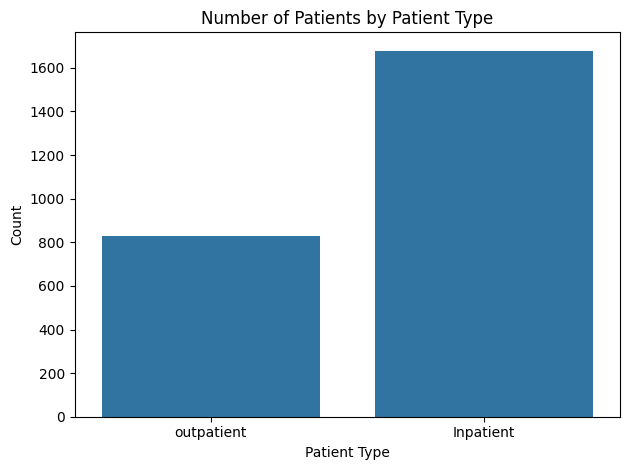

In [ ]:
#Count plot

sns.countplot(data=df, x='Patient type')
plt.title('Number of Patients by Patient Type')
plt.xlabel('Patient Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


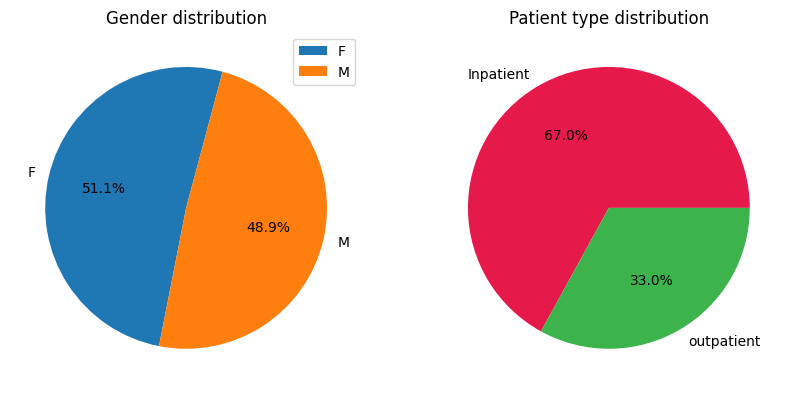

In [ ]:
#Pie Chart

gender_type = df['Gender'].value_counts()
patient_type = df['Patient type'].value_counts()
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Gender distribution')
plt.pie(gender_type,labels=gender_type.index,autopct='%1.1f%%',startangle = 75)
plt.legend()

plt.subplot(1,2,2)
plt.title('Patient type distribution')
plt.pie(patient_type,labels=patient_type.index,autopct='%1.1f%%',colors=['#e6194b', '#3cb44b'])
plt.show()

(array([794.,   0., 695.,   0., 317.,   0., 512.,   0., 188.]),
 array([0.        , 0.44444444, 0.88888889, 1.33333333, 1.77777778,
        2.22222222, 2.66666667, 3.11111111, 3.55555556, 4.        ]),
 <BarContainer object of 9 artists>)

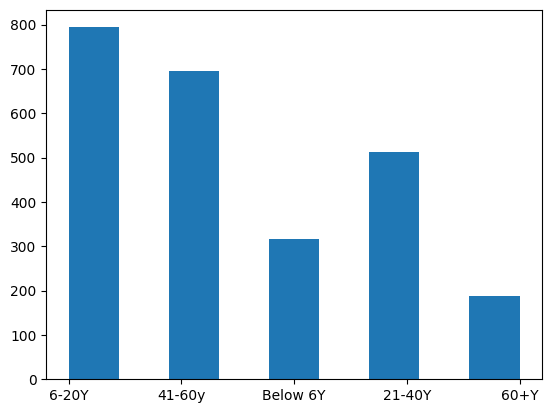

In [ ]:
#Count of no of patient from age group

plt.hist(df['Age Bucket'],bins=9)

/tmp/ipython-input-76-2917019245.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ER_Time', y='Department_Name', data=avg_er_time_by_dept, palette='viridis')


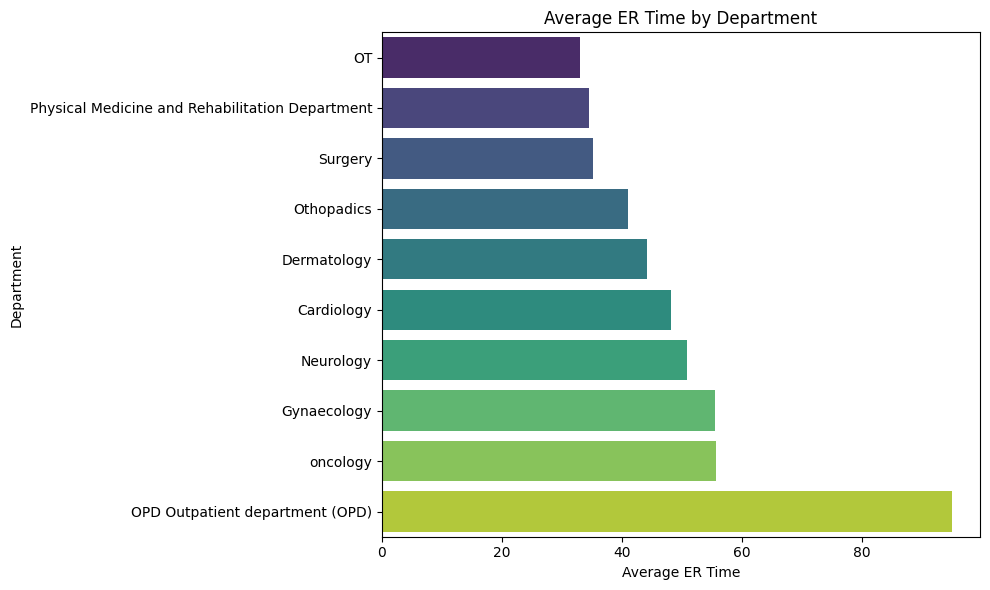

In [ ]:
#Average Emergency Room utilization for patient from different departments

avg_er_time_by_dept = df.groupby('Department_Name')['ER_Time'].mean().reset_index()

avg_er_time_by_dept = avg_er_time_by_dept.sort_values(by='ER_Time')

plt.figure(figsize=(10, 6))
sns.barplot(x='ER_Time', y='Department_Name', data=avg_er_time_by_dept, palette='viridis')
plt.title('Average ER Time by Department')
plt.xlabel('Average ER Time')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

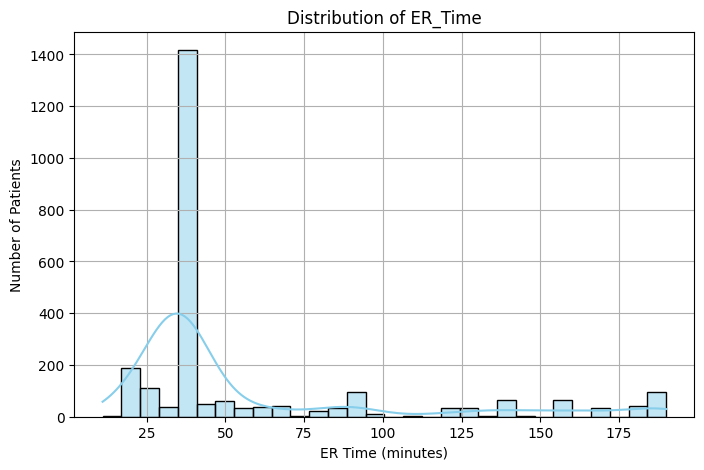

In [ ]:
#Distribution on Emergency room utilization with patient count
plt.figure(figsize=(8,5))
sns.histplot(df['ER_Time'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of ER_Time')
plt.xlabel('ER Time (minutes)')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.show()

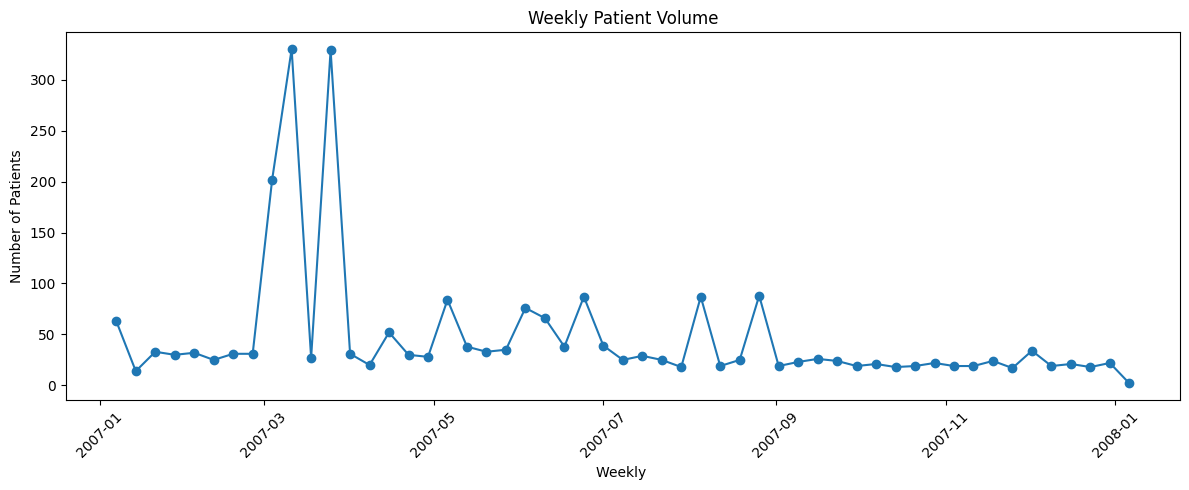

In [ ]:
# Weekly average patient count

weekly_avg = df.resample('W')['ID'].count().reset_index()
weekly_avg.columns = ['week_starting', 'average_weekly_patients']

# Weekly trend plot
plt.figure(figsize=(12, 5))
plt.plot(weekly_avg['week_starting'], weekly_avg['average_weekly_patients'], marker='o')
plt.title('Weekly Patient Volume')
plt.xlabel('Weekly ')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




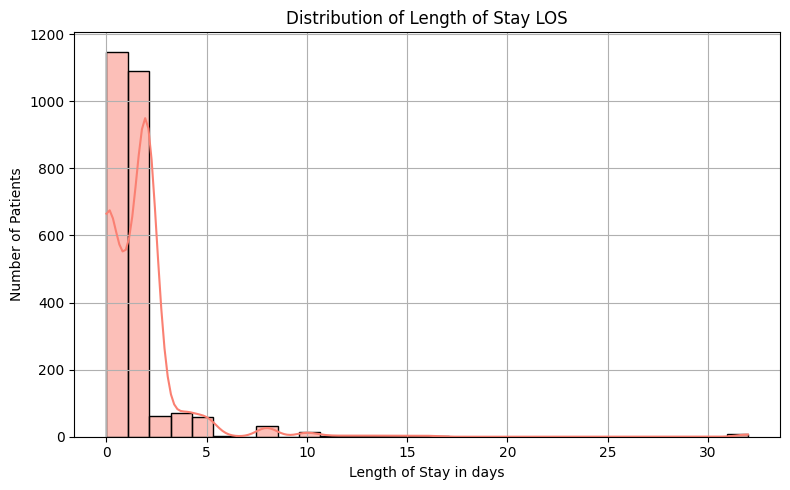

In [ ]:
#Distribution of length of stay
plt.figure(figsize=(8,5))
sns.histplot(df['LOS'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Length of Stay LOS')
plt.xlabel('Length of Stay in days')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.tight_layout()
plt.show()

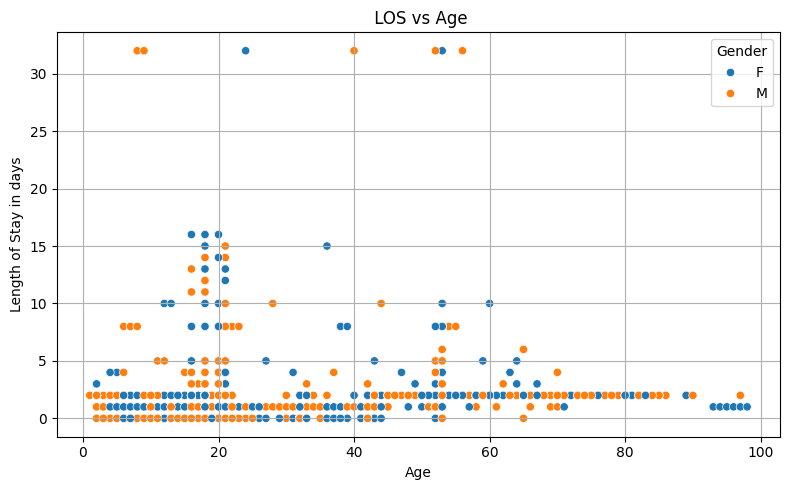

In [ ]:
#Length of stay based on age
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='LOS', hue='Gender')
plt.title(' LOS vs Age')
plt.xlabel('Age')
plt.ylabel('Length of Stay in days')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
df = df.drop(columns='ID')

In [ ]:
df_copy = df.copy()

In [ ]:
# Encoding categorical variables

le = LabelEncoder()
for col in df_copy.select_dtypes(include='object').columns:
    df_copy[col] = le.fit_transform(df_copy[col].astype(str))

<Axes: >

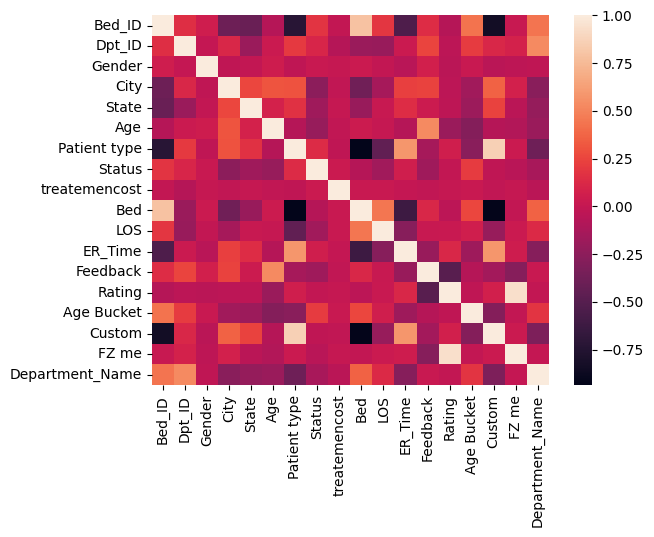

In [ ]:
#Correlation
corr = df_copy.corr(numeric_only=True)
sns.heatmap(corr)

In [ ]:
X = df_copy.drop(columns='LOS')
y = df_copy['LOS']

In [ ]:
# Normalising numerical values
num_cols = X.select_dtypes(include='number').columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [ ]:
# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(2004, 17) (2004,) (502, 17) (502,)


In [ ]:
# Training model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#Evaluating model using r2_score and mse

r2_score= r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f" R² Score: {r2_score}")
print(f" Mean Squared Error: {mse}")

 R² Score: 0.8723320731239533
 Mean Squared Error: 0.8664015936254981
